In [106]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score,roc_curve,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
train_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/데이콘/train.csv', encoding='cp949')
test_data =  pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/데이콘/public_test.csv', encoding='cp949')
train_data

,id,year_month,text,smishing
0,0,2017-01,XXX은행성산XXX팀장입니다.행복한주말되세요,0
1,1,2017-01,오늘도많이웃으시는하루시작하세요XXX은행 진월동VIP라운지 XXX올림,0
2,2,2017-01,안녕하십니까 고객님. XXX은행입니다.금일 납부하셔야 할 금액은 153600원 입니...,0
3,4,2017-01,XXX 고객님안녕하세요XXX은행 XXX지점입니다지난 한 해 동안 저희 XXX지점에 ...,0
4,5,2017-01,1월은 새로움이 가득XXX입니다.올 한해 더 많이행복한 한해되시길바랍니다,0
...,...,...,...,...
295940,336373,2018-12,XXX 고객님!열심히 달려왔던 2018년도 어느 새 뒤안길로 지나쳐가고 벅찬 설렘으...,0
295941,336375,2018-12,XXX고객님실버웰빙신탁이 만기도래 예정입니다.XXX남양주지점,0
295942,336376,2018-12,한해동안 XXX은행과 함께 해주셔서 정말 감사드립니다 2019년 기해년을 맞이하며 ...,0
295943,336377,2018-12,1228(금)예금및 적금 만기입니다.예금은 시간내서 내점하시고 적금은 1년 자동연장...,0


In [0]:
test_data

,id,year_month,text
0,340000,2019-01,XXX고객님! 안녕하세요? 새롭게 시작하는 한 주 행복 가득하시길 기원합니다. 지난...
1,340001,2019-01,긴급 안내 XXX은행 가락동 지점 - 헬리오XXX 기본XXX 대출이자를 ...
2,340002,2019-01,XXX 고객님 안녕하세요올해는 미세먼지가 유난인거 같습니다.엊그제 새해가 시작된거같...
3,340003,2019-01,XXX 고객님찾아온 행운을 잡으셨나요? 못잡으셨다면 이번에 다시 잡으시길 기원합니다...
4,340004,2019-01,XXX 고객님새해 복 많이 받으세요 XXX은행 코스트코 퇴직연금 담당자입니다. 고...
...,...,...,...
1621,341621,2019-04,(광고)XXX 고객님안녕하십니까!!고객님의 소중한 업무처리를 도와드린 kb창원중앙동...
1622,341622,2019-04,고객님 항상 저희 지점을 거래해 주셔서 감사합니다 본점 서비스 설문 전화 받으시면...
1623,341623,2019-04,XXX 고객님 저희 XXX은행 XXX지점을 이용해주셔서 감사드립니다 이번주도 더 ...
1624,341624,2019-04,(광고)알림 신청하면 매일 현금 100만원! XXX부동산 리브온지금 XXX부동산 리...


In [0]:
train_data['text'][0]

'XXX은행성산XXX팀장입니다.행복한주말되세요'

# 피처 벡터화(전처리)

In [0]:
X_train=train_data['text']
y_train=train_data['smishing']
submit_test=test_data['text']

## 1. TF-IDF

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Tf-IDF 벡터화 적용하여 학습 데이터 세트와 테스트 세트 변환
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(X_train)
X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_test_tidf_vect = tfidf_vect.transform(submit_test)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X_train_tfidf_vect, y_train, test_size=0.4, random_state=123)

In [0]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(177567, 441023)
(177567,)
(118378, 441023)
(118378,)


In [0]:
# over sampling
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# 모델설정
sm = SMOTE(ratio='auto', kind='regular')

# train데이터를 넣어 복제함
X_resampled, y_resampled = sm.fit_sample(X_train,list(y_train))

### 분류지표 함수 생성

In [0]:
def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test, pred)
    roc_score = roc_auc_score(y_test,pred)
    print("오차행렬")
    print(confusion)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f},F1 : {3:.4f}, ROC AUC 값 {4:.4f}: '.format(accuracy, precision, recall, f1, roc_score))

In [0]:
def get_model_train_eval(model,ftr_train=None,ftr_test=None,
                         tgt_train=None,tgt_test=None):
  model.fit(ftr_train,tgt_train)
  pred = model.predict(ftr_test)
  get_clf_eval(tgt_test,pred)

### sklearn-로지스틱회귀

In [0]:
lr_clf= LogisticRegression()
get_model_train_eval(lr_clf,ftr_train=X_resampled,ftr_test=X_test,
                     tgt_train=y_resampled,tgt_test=y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


오차행렬
[[110905      2]
 [    28   7443]]
정확도 : 0.9997, 정밀도 : 0.9997, 재현율 : 0.9963,F1 : 0.9980, ROC AUC 값 0.9981: 


#### Submit

In [0]:
submit=pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/데이콘/public_test.csv', encoding='cp949')

In [0]:
Y_predict = lr_clf.predict(X_test_tidf_vect)

In [0]:
submit['smishing']=Y_predict

In [0]:
submit['smishing'].value_counts()

0    1553
1      73
Name: smishing, dtype: int64

### sklearn- LightGBM 

In [0]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals= [(X_test,y_test)]
lgbm_clf.fit(X_resampled,y_resampled,early_stopping_rounds=100,eval_metric='auc',
             eval_set=evals,verbose=True)

[1]	valid_0's binary_logloss: 0.59921	valid_0's auc: 0.997242
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.522287	valid_0's auc: 0.997599
[3]	valid_0's binary_logloss: 0.458136	valid_0's auc: 0.997922
[4]	valid_0's binary_logloss: 0.403962	valid_0's auc: 0.997986
[5]	valid_0's binary_logloss: 0.35761	valid_0's auc: 0.997992
[6]	valid_0's binary_logloss: 0.317644	valid_0's auc: 0.998323
[7]	valid_0's binary_logloss: 0.283041	valid_0's auc: 0.998475
[8]	valid_0's binary_logloss: 0.252768	valid_0's auc: 0.998555
[9]	valid_0's binary_logloss: 0.226304	valid_0's auc: 0.998777
[10]	valid_0's binary_logloss: 0.202997	valid_0's auc: 0.99885
[11]	valid_0's binary_logloss: 0.182447	valid_0's auc: 0.998899
[12]	valid_0's binary_logloss: 0.164253	valid_0's auc: 0.998898
[13]	valid_0's binary_logloss: 0.148065	valid_0's auc: 0.998814
[14]	valid_0's binary_logloss: 0.133704	valid_0's auc: 0.998852
[15]	valid_0's binary_logloss: 0.120904	valid_0's auc

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=500, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [0]:
Y_predict = lgbm_clf.predict(X_test_tidf_vect)

In [0]:
submit['smishing']=Y_predict

In [0]:
submit['smishing'].value_counts()

0    1539
1      87
Name: smishing, dtype: int64

### keras-로지스틱회귀
- 시간이 너무 오래걸림

In [0]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras import backend as K

Using TensorFlow backend.


In [0]:
def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [0]:
'''
#3. 모델 구성하기
model = Sequential()
model.add(Dense(128, input_dim=X_resampled.shape[1], activation ='relu'))
model.add(Dense(64, activation ='relu'))
model.add(Dense(32, activation ='relu'))
model.add(Dense(16, activation ='relu'))
model.add(Dense(8, activation ='relu'))
model.add(Dense(1, activation ='sigmoid'))

#4. 모델 학습과정 설정하기
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['acc',f1_m,precision_m, recall_m])



#5. 모델 학습시키기
#5.1. Early Stopping
callbacks_list = [
    EarlyStopping(
    monitor='val_loss',
    patience=10,
    ),
     ModelCheckpoint(
     filepath='multi_model.h5',
     monitor='val_f1_m',
     save_best_only=True,
     )
]

hist = model.fit(X_resampled, y_resampled, epochs = 100,batch_size=1000,callbacks=callbacks_list,validation_data=(X_test, y_test))

#6. 모델 평가하기
scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

#epoch, loss, acc 그래프
loss = hist.history['loss']
val_loss = hist.history['val_loss']
acc = hist.history['acc']
val_acc = hist.history['val_acc']

epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')

plt.title('Training/Validation loss and accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
'''

'\n#3. 모델 구성하기\nmodel = Sequential()\nmodel.add(Dense(128, input_dim=X_resampled.shape[1], activation =\'relu\'))\nmodel.add(Dense(64, activation =\'relu\'))\nmodel.add(Dense(32, activation =\'relu\'))\nmodel.add(Dense(16, activation =\'relu\'))\nmodel.add(Dense(8, activation =\'relu\'))\nmodel.add(Dense(1, activation =\'sigmoid\'))\n\n#4. 모델 학습과정 설정하기\nmodel.compile(loss=\'binary_crossentropy\',optimizer=\'adam\', metrics=[\'acc\',f1_m,precision_m, recall_m])\n\n\n\n#5. 모델 학습시키기\n#5.1. Early Stopping\ncallbacks_list = [\n    EarlyStopping(\n    monitor=\'val_loss\',\n    patience=10,\n    ),\n     ModelCheckpoint(\n     filepath=\'multi_model.h5\',\n     monitor=\'val_f1_m\',\n     save_best_only=True,\n     )\n]\n\nhist = model.fit(X_resampled, y_resampled, epochs = 100,batch_size=1000,callbacks=callbacks_list,validation_data=(X_test, y_test))\n\n#6. 모델 평가하기\nscores = model.evaluate(X_test, y_test)\nprint("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))\n\n#epoch, loss, acc 그래프

In [0]:
# Y_predict = model.predict(X_test_tidf_vect)
# submit['smishing']=Y_predict
# submit['smishing'].value_counts()

## 2. 동규 방식 

In [0]:
for i in [0,1]:
  f = open('/content/drive/My Drive/Colab Notebooks/data/데이콘/smishing_OverSampling_%d.txt'%i,'w')
  for line in train_data[train_data['smishing']==i]['text']:
    f.write('%s\n'%(line))
  f.close()

### class별 상위 단어 뽑기

In [0]:
#class 0

f = open('/content/drive/My Drive/Colab Notebooks/data/데이콘/smishing_OverSampling_0.txt','r')
lines_0 = f.readlines()
lines_0 = [l.rstrip() for l in lines_0]
f.close()

text_0=' '.join(lines_0)
word_list_0 = text_0.split(' ')
sorted_word_list_0= sorted(word_list_0)
sorted_word_list_0[-1]
print(len(sorted_word_list_0))

# 1000개이상 단어 출력

num=1
kk_0={}
for idx,w in enumerate(sorted_word_list_0):
    if idx == len(sorted_word_list_0)-1:
        break
    if w == sorted_word_list_0[idx+1]:
        num +=1
    else:
        if num >= 1000:
            kk_0[w]=num
        num=0

print(len(kk_0))

6526015
900


In [0]:
#class 1

f = open('/content/drive/My Drive/Colab Notebooks/data/데이콘/smishing_OverSampling_1.txt','r')
lines_1 = f.readlines()
lines_1 = [l.rstrip() for l in lines_1]
f.close()

text_1=' '.join(lines_1)
word_list_1 = text_1.split(' ')

sorted_word_list_1= sorted(word_list_1)
print(len(sorted_word_list_1))

# 1000개이상 나오는 단어 출력

num=1
kk_1={}
for idx,w in enumerate(sorted_word_list_1):
    if idx == len(sorted_word_list_1)-1:
        break
    if w == sorted_word_list_1[idx+1]:
        num +=1
    else:
        if num >= 1000:
            kk_1[w]=num
        num=0

print(len(kk_1))

2668135
557


In [0]:
train_set=set()

for name in kk_0:
  train_set.add(name)

for name in kk_1:
  train_set.add(name)

print(len(train_set))
train_set=list(train_set)

1354


In [0]:
# Word 통일
print(train_data.shape)
train_vect = np.zeros((295945,len(train_set)))

start = time.time() 
for i in range(0,len(train_data['text'])):
  text_list=train_data['text'][i].split(' ')
  for text in text_list:
    try:
      train_vect[i][train_set.index(text)]=1
    except ValueError:
      pass
end = time.time() - start     
print(end/1000)

(295945, 4)
0.16912667894363403


In [0]:
print(test_data.shape)
test_vect = np.zeros((1626,len(train_set)))

start = time.time() 
for i in range(0,len(test_data['text'])):
  text_list=test_data['text'][i].split(' ')
  for text in text_list:
    try:
      test_vect[i][train_set.index(text)]=1
    except ValueError:
      pass
end = time.time() - start     
print(end/1000)

(1626, 3)
0.001809617280960083


In [0]:
#Data Split

train_label=np.array(train_data['smishing'])
train_label

array([0, 0, 0, ..., 0, 0, 0])

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(train_vect,train_label, test_size=0.4, random_state=123)
#X_val, X_test,y_val,y_test = train_test_split(X_test,y_test, test_size=0.5, random_state=123)

In [0]:
# over sampling
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# 모델설정
sm = SMOTE(ratio='auto', kind='regular')

# train데이터를 넣어 복제함
X_train_os, y_train_os = sm.fit_sample(X_train,list(y_train))

In [0]:
print(X_train_os.shape)
print(y_train_os.shape)
#print(X_val.shape)
#print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

- OverSampling을 하였을 때는 Cross-Validation을 사용하는 것이 좋음
- 임계값을 표현해 재현율과 정밀도를 올려보자

### sklearn LightLBGM

In [0]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(n_estimators=1000,num_leaves=64,n_jobs=1,boost_from_average=False)
 
get_model_train_eval(model,ftr_train=X_train_os,ftr_test=X_test,
                     tgt_train=y_train_os,tgt_test=y_test)

In [0]:
# model = LGBMClassifier(n_estimators=1000)

# evals= [(X_test,y_test)]
# model.fit(X_train_os,y_train_os,early_stopping_rounds=100,eval_metric='auc',
#             eval_set=evals,verbose=True) 

#### submit

In [0]:
submit=pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/데이콘/public_test.csv', encoding='cp949')

In [0]:
submit=pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/데이콘/public_test.csv', encoding='cp949')
pred=model.predict(test_vect)
submit['smishing']=pred
submit['smishing'].value_counts()

In [0]:
submit.drop(['year_month','text'], axis='columns', inplace=True)

In [0]:
submit.to_csv("/content/drive/My Drive/Colab Notebooks/data/데이콘/gyu_submit_keras_OverSampling_LGBM2.csv", mode='w')

### keras-Logistic

In [0]:
#3. 모델 구성하기
model = Sequential()
model.add(Dense(128, input_dim=X_train_os.shape[1], activation ='relu'))
model.add(Dense(64, activation ='relu'))
model.add(Dense(32, activation ='relu'))
model.add(Dense(16, activation ='relu'))
model.add(Dense(8, activation ='relu'))
model.add(Dense(1, activation ='sigmoid'))

#4. 모델 학습과정 설정하기
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['acc',f1_m,precision_m, recall_m])



#5. 모델 학습시키기
#5.1. Early Stopping
callbacks_list = [
    EarlyStopping(
    monitor='val_loss',
    patience=10,
    ),
     ModelCheckpoint(
     filepath='multi_model.h5',
     monitor='val_f1_m',
     save_best_only=True,
     )
]

hist = model.fit(X_train_os, y_train_os, epochs = 100,batch_size=1000,callbacks=callbacks_list,validation_data=(X_test, y_test))

#6. 모델 평가하기
scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

#epoch, loss, acc 그래프
loss = hist.history['loss']
val_loss = hist.history['val_loss']
acc = hist.history['acc']
val_acc = hist.history['val_acc']

epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')

plt.title('Training/Validation loss and accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
submit=pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/데이콘/public_test.csv', encoding='cp949')
pred=model.predict(test_vect)
submit['smishing']=pred
submit.loc[submit['smishing']>=0.5,'smishing']=1
submit.loc[submit['smishing']<0.5,'smishing']=0
submit['smishing'].value_counts()

#수정방식

In [0]:
train_data_text = pd.DataFrame(train_data['text'])
train_data_text

In [0]:
smishing_1=pd.DataFrame(train_data[train_data["smishing"]==1]["text"])
smishing_0=pd.DataFrame(train_data[train_data["smishing"]!=1]["text"])
smishing_1

### 불용어 처리 - KonPLy, Mecab
현재 다양한 자연어 처리 패키지 중에서 mecab는 윈도우에서는 설치가 힘든 패키지 중 하나이다.

이를 극복하기 위해, colab에서 mecab를 설치하고 활용할 수 있도록 colab 파일을 공유하고자 한다.

In [24]:
! git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 47 (delta 16), reused 20 (delta 5), pack-reused 0
Unpacking objects: 100% (47/47), done.


In [25]:
ls

drive/  Mecab-ko-for-Google-Colab/  sample_data/


In [26]:
cd Mecab-ko-for-Google-Colab/

/content/Mecab-ko-for-Google-Colab


In [27]:
ls

images/  install_mecab-ko_on_colab190912.sh  README.md


In [28]:
! bash install_mecab-ko_on_colab190912.sh

Installing konlpy.....
     |████████████████████████████████| 19.4MB 229kB/s 
     |████████████████████████████████| 92kB 9.5MB/s 
     |████████████████████████████████| 491kB 24.3MB/s 
  Created wheel for JPype1: filename=JPype1-0.7.1-cp36-cp36m-linux_x86_64.whl size=2455172 sha256=6c74c21e25939ac241216efd9580f574def602d94ce7c0acb01ccedc2f9bbf22
  Stored in directory: /root/.cache/pip/wheels/b0/49/6a/4393ef8542c00becf80691bd242693db9e263d6e499323a984
Successfully built JPype1
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2020-01-08 10:15:28--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.

### Mecab()활용하여 토큰화

In [0]:
import konlpy
from konlpy.tag import Mecab
from tqdm import tqdm #시간 측정용
tokenizer = Mecab() # setting tokenizer using Mecab()

In [0]:
from tqdm import tqdm #시간 측정용

train_doc_0 = [( tokenizer.pos(x) ) for x in tqdm(smishing_0['text'])]
train_doc_1 = [ ( tokenizer.pos(x) ) for x in tqdm(smishing_1['text'])] # Mecab를 활용하여 text를 토큰화 시킴


In [0]:
import itertools
def chain(*iterables):
    # chain('ABC', 'DEF') --> ['A', 'B', 'C', 'D', 'E', 'F']
    for it in iterables:
        for element in it:
            yield element

In [0]:
train1_list=list(itertools.chain(*train_doc_1))
train0_list=list(itertools.chain(*train_doc_0))

In [0]:
print(train1_list[0],sep="")

In [0]:
train1_list[:5] # 각 [(메세지('단어', '타입'))] 이런형태로 뱉아냄

In [0]:
train0_list[:5] # 각 [(메세지('단어', '타입'))] 이런형태로 뱉아냄

In [0]:
train_1_meaning=pd.DataFrame(train1_list)
train_1_meaning  

In [0]:
train_0_meaning=pd.DataFrame(train0_list)
train_0_meaning  

In [0]:
#제거해야할 단어 종류 목록
stopwords=['SSO','SSC', 'SL', 'XSN', 'JKB+JX', 'VA+ETM', 'JKB','VA', 'EC', 'XSV+EF', 'SF', 'JKG', 'JC', 'JKS', 'XSV', 'XR', 'XSA', 'JKO', 'VX', 'EP+ETM', 'JX', 'VCP+ETM','EP',
           'EF', 'SC', 'SY', 'EP+EC', 'SN', 'VCP', 'XSA+ETM', 'VX+EF', 'XPN', 'ETM', 'EP+EP', 'NR','XSV+EC', 'JKC', 'VCN+EF', 'ETN', 'VCP+EF','VX+ETM', 'VCP+EC', 'EP+EF', 'ETN+VCP+EF',
           'VX+EP','VA+ETN', 'VCN', 'XSV+ETM', 'XSA+EF','UNKNOWN', 'XSV+EP', 'EP+EP+ETM','EP+EP+EC', 'XSV+ETN', 'VX+EP+EC', 'EP+EP+EF', 'VX+EC','EP+EF+VCP', 'ETN+JKO', 'VCP+EP+EF',
           'XSA+EC', 'NNB+JX', 'VA+EP+EF', 'VCN+ETN', 'XSA+EC+VX+ETM', 'VA+EF','JKQ', 'ETN+ETM', 'VA+EC', 'EP+NA','VCP+EP', 'VA+EC+VX+EP', 'VX+EP+EF','EC+XSV+ETM', 'XSA+ETN', 'EC+VX+EF', 'VCN+ETM', 'VA+EP+ETM','EC+VX+EC', 'VX+EC+VX+ETM', 'VA+ETN+JKB+JX','VA+EP', 'EC+JX', 'EP+EC+VX+EC','JKB+JKO', 'JKS+EP+EC',
           'VX+ETN','VCP+ETN', 'XSA+EC+VX+EP', 'XSV+EC+VCP', 'VA+EC+VX+EC','VA+EC+VX+ETM', 'JX+ETM', 'JKV', 'VA+JX']


In [0]:
# # ram 과부하 상황을 위해 미리 저장 해둠.
# train_0_meaning[train_0_meaning[1].isin(stopwords) != True]
train_0_meaning[~train_0_meaning[1].isin(stopwords)].to_csv("/content/drive/My Drive/Colab Notebooks/data/데이콘/불용어처리_0.csv", mode='w')
train_1_meaning[~train_1_meaning[1].isin(stopwords)].to_csv("/content/drive/My Drive/Colab Notebooks/data/데이콘/불용어처리_1.csv", mode='w')

In [0]:
final_0=train_0_meaning[train_0_meaning[1].isin(stopwords) != True]
final_1=train_1_meaning[train_1_meaning[1].isin(stopwords) != True]

In [0]:
final_0_list=list(final_0[0])
final_1_list=list(final_1[0])
sorted_word_list_0= sorted(final_0_list)
sorted_word_list_1= sorted(final_1_list)

In [0]:
#train_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/데이콘/train.csv', encoding='cp949')
#test_data =  pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/데이콘/public_test.csv', encoding='cp949')

In [0]:
#train_data['text'] = [( tokenizer.pos(x) ) for x in tqdm(train_data['text'])]
#train_data.to_csv("/content/drive/My Drive/Colab Notebooks/data/데이콘/token_train.csv", mode='w')

NameError: ignored

In [0]:
train_data

In [0]:
train_data['text'][0]

In [0]:
len(train_data['text'][1])

In [0]:
'''
for i in range(0,len(train_data)):
  new_list=[]
  if train_data['smishing'][i]==0:
    for j in range(0,len(train_data['text'][i])):
      if train_data['text'][i][j][0] in sorted_word_list_0:
        new_list.append(train_data['text'][i][j][0])
    train_data['text'][i]= new_list
  else:
    for j in range(0,len(train_data['text'][i])):
      if train_data['text'][i][j][0] in sorted_word_list_1:
        new_list.append(train_data['text'][i][j][0])
    train_data['text'][i]= new_list
'''

## 정리

In [0]:
token_train=pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/데이콘/token_train.csv")
token_train=token_train.drop('Unnamed: 0',axis=1)

In [0]:
from ast import literal_eval
token_train['text'] = token_train['text'].apply(literal_eval)

In [0]:
token_train.head()

,id,year_month,text,smishing
0,0,2017-01,"[(XXX, SL), (은, JX), (행성, NNG), (산, NNG), (XXX...",0
1,1,2017-01,"[(오늘, NNG), (도, JX), (많이, MAG), (웃, VV), (으시, ...",0
2,2,2017-01,"[(안녕, NNG), (하, XSV), (십니까, EP+EF), (고객, NNG),...",0
3,4,2017-01,"[(XXX, SL), (고객, NNG), (님, XSN), (안녕, NNG), (하...",0
4,5,2017-01,"[(1, SN), (월, NNBC), (은, JX), (새로움, VA+ETN), (...",0


In [0]:
#제거해야할 단어 종류 목록
stopwords=['SSO','SSC', 'SL', 'XSN', 'JKB+JX', 'VA+ETM', 'JKB','VA', 'EC', 'XSV+EF', 'SF', 'JKG', 'JC', 'JKS', 'XSV', 'XR', 'XSA', 'JKO', 'VX', 'EP+ETM', 'JX', 'VCP+ETM','EP',
           'EF', 'SC', 'SY', 'EP+EC', 'SN', 'VCP', 'XSA+ETM', 'VX+EF', 'XPN', 'ETM', 'EP+EP', 'NR','XSV+EC', 'JKC', 'VCN+EF', 'ETN', 'VCP+EF','VX+ETM', 'VCP+EC', 'EP+EF', 'ETN+VCP+EF',
           'VX+EP','VA+ETN', 'VCN', 'XSV+ETM', 'XSA+EF','UNKNOWN', 'XSV+EP', 'EP+EP+ETM','EP+EP+EC', 'XSV+ETN', 'VX+EP+EC', 'EP+EP+EF', 'VX+EC','EP+EF+VCP', 'ETN+JKO', 'VCP+EP+EF',
           'XSA+EC', 'NNB+JX', 'VA+EP+EF', 'VCN+ETN', 'XSA+EC+VX+ETM', 'VA+EF','JKQ', 'ETN+ETM', 'VA+EC', 'EP+NA','VCP+EP', 'VA+EC+VX+EP', 'VX+EP+EF','EC+XSV+ETM', 'XSA+ETN', 'EC+VX+EF', 'VCN+ETM', 'VA+EP+ETM','EC+VX+EC', 'VX+EC+VX+ETM', 'VA+ETN+JKB+JX','VA+EP', 'EC+JX', 'EP+EC+VX+EC','JKB+JKO', 'JKS+EP+EC',
           'VX+ETN','VCP+ETN', 'XSA+EC+VX+EP', 'XSV+EC+VCP', 'VA+EC+VX+EC','VA+EC+VX+ETM', 'JX+ETM', 'JKV', 'VA+JX']

#포함해야할 단어 종류 목록
inwords =['NNG', 'NNP', 'NNB', 'NNM', 'NR', 'NP', 'VV', 'VA', 'VXV', 'VXA', 'IC']

In [0]:
token_train_last = []
for idx, val in enumerate(token_train["text"]):
    word = []
    for j in val:
        if j[1] in inwords:
            word.append(j)
    token_train_last.append(word)

In [0]:
token_train['token_text']= token_train_last

In [0]:
token_train

,id,year_month,text,smishing,token_text
0,0,2017-01,"[(XXX, SL), (은, JX), (행성, NNG), (산, NNG), (XXX...",0,"[(행성, NNG), (산, NNG), (팀장, NNG), (행복, NNG), (주..."
1,1,2017-01,"[(오늘, NNG), (도, JX), (많이, MAG), (웃, VV), (으시, ...",0,"[(오늘, NNG), (웃, VV), (하루, NNG), (시작, NNG), (은행..."
2,2,2017-01,"[(안녕, NNG), (하, XSV), (십니까, EP+EF), (고객, NNG),...",0,"[(안녕, NNG), (고객, NNG), (은행, NNG), (금일, NNG), (..."
3,4,2017-01,"[(XXX, SL), (고객, NNG), (님, XSN), (안녕, NNG), (하...",0,"[(고객, NNG), (안녕, NNG), (은행, NNG), (지점, NNG), (..."
4,5,2017-01,"[(1, SN), (월, NNBC), (은, JX), (새로움, VA+ETN), (...",0,"[(한, NNG), (행복, NNG), (해, NNG)]"
...,...,...,...,...,...
295940,336373,2018-12,"[(XXX, SL), (고객, NNG), (님, XSN), (!, SF), (열심히...",0,"[(고객, NNG), (뒤안길, NNG), (신년, NNG), (기운, NNG), ..."
295941,336375,2018-12,"[(XXX, SL), (고객, NNG), (님, XSN), (실버, NNP), (웰...",0,"[(고객, NNG), (실버, NNP), (웰빙, NNP), (신탁, NNG), (..."
295942,336376,2018-12,"[(한, MM), (해, NNG), (동안, NNG), (XXX, SL), (은행,...",0,"[(해, NNG), (동안, NNG), (은행, NNG), (감사, NNG), (기..."
295943,336377,2018-12,"[(1228, SN), ((, SSO), (금, NNG), (), SSC), (예금...",0,"[(금, NNG), (예금, NNG), (적금, NNG), (만기, NNG), (예..."


# 여기서 부터 실행시키기

In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#final_frame = token_train[['id','token_text','smishing']]
#final_frame.to_csv("/content/drive/My Drive/Colab Notebooks/data/데이콘/final_frame.csv", mode='w')

import pandas as pd

###### train,test 데이터 설정
- 위에서 konply 다운로드 필요

In [69]:
test_data =  pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/데이콘/public_test.csv', encoding='cp949')
test_data.head()

,id,year_month,text
0,340000,2019-01,XXX고객님! 안녕하세요? 새롭게 시작하는 한 주 행복 가득하시길 기원합니다. 지난...
1,340001,2019-01,긴급 안내 XXX은행 가락동 지점 - 헬리오XXX 기본XXX 대출이자를 ...
2,340002,2019-01,XXX 고객님 안녕하세요올해는 미세먼지가 유난인거 같습니다.엊그제 새해가 시작된거같...
3,340003,2019-01,XXX 고객님찾아온 행운을 잡으셨나요? 못잡으셨다면 이번에 다시 잡으시길 기원합니다...
4,340004,2019-01,XXX 고객님새해 복 많이 받으세요 XXX은행 코스트코 퇴직연금 담당자입니다. 고...


In [70]:
from tqdm import tqdm #시간 측정용
test_data['text'] = [( tokenizer.pos(x) ) for x in tqdm(test_data['text'])]


100%|██████████| 1626/1626 [00:01<00:00, 1383.64it/s]

In [0]:
token_test_last = []
for idx, val in enumerate(test_data["text"]):
    word = []
    for j in val:
        if j[1] in inwords:
            word.append(j)
    token_test_last.append(word)

In [0]:
test_data['token_text']= token_test_last

In [0]:
#튜플 풀고 문자로만 구성된 리스트를 만드는 알고리즘
all_list=[]
for i in range(len(test_data)):
  new_list=[]
  for j in range(len(test_data['token_text'][i])):
    new_text=' '.join(list(test_data['token_text'][i][j]))
    new_list.append(new_text)
  all_list.append(new_list)

In [0]:
test_data['new_token_text']=all_list

In [75]:
final_test=test_data[['id','new_token_text']]
final_test.head()

,id,new_token_text
0,340000,"[고객 NNG, 안녕 IC, 하 VV, 새롭 VA, 시작 NNG, 행복 NNG, 하..."
1,340001,"[긴급 NNG, 안내 NNG, 은행 NNG, 가락동 NNP, 지점 NNG, 헬리오 ..."
2,340002,"[고객 NNG, 안녕 NNG, 올해 NNG, 미세먼지 NNP, 유난 NNG, 거 N..."
3,340003,"[고객 NNG, 행운 NNG, 잡 VV, 잡 VV, 이번 NNG, 잡 VV, 기원 ..."
4,340004,"[고객 NNG, 새해 NNG, 복 NNG, 받 VV, 은행 NNG, 코스트코 NNP..."


In [0]:
final_frame=pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/데이콘/final_frame.csv")
final_frame = final_frame[['id','token_text','smishing']]

In [77]:
final_frame

,id,token_text,smishing
0,0,"[('행성', 'NNG'), ('산', 'NNG'), ('팀장', 'NNG'), (...",0
1,1,"[('오늘', 'NNG'), ('웃', 'VV'), ('하루', 'NNG'), ('...",0
2,2,"[('안녕', 'NNG'), ('고객', 'NNG'), ('은행', 'NNG'), ...",0
3,4,"[('고객', 'NNG'), ('안녕', 'NNG'), ('은행', 'NNG'), ...",0
4,5,"[('한', 'NNG'), ('행복', 'NNG'), ('해', 'NNG')]",0
...,...,...,...
295940,336373,"[('고객', 'NNG'), ('뒤안길', 'NNG'), ('신년', 'NNG'),...",0
295941,336375,"[('고객', 'NNG'), ('실버', 'NNP'), ('웰빙', 'NNP'), ...",0
295942,336376,"[('해', 'NNG'), ('동안', 'NNG'), ('은행', 'NNG'), (...",0
295943,336377,"[('금', 'NNG'), ('예금', 'NNG'), ('적금', 'NNG'), (...",0


In [78]:
' '.join(list(final_frame['token_text'][0][0]))

'['

In [0]:
# text가 문자형으로 읽히므로 바꿔줘야함
from ast import literal_eval
final_frame['token_text'] = final_frame['token_text'].apply(literal_eval)

In [80]:
' '.join(list(final_frame['token_text'][0][0]))

'행성 NNG'

In [0]:
#튜플 풀고 문자로만 구성된 리스트를 만드는 알고리즘
all_list=[]
for i in range(len(final_frame)):
  new_list=[]
  for j in range(len(final_frame['token_text'][i])):
    new_text=' '.join(list(final_frame['token_text'][i][j]))
    new_list.append(new_text)
  all_list.append(new_list)

In [0]:
final_frame['new_token_text']=all_list

In [83]:
final_frame

,id,token_text,smishing,new_token_text
0,0,"[(행성, NNG), (산, NNG), (팀장, NNG), (행복, NNG), (주...",0,"[행성 NNG, 산 NNG, 팀장 NNG, 행복 NNG, 주말 NNG]"
1,1,"[(오늘, NNG), (웃, VV), (하루, NNG), (시작, NNG), (은행...",0,"[오늘 NNG, 웃 VV, 하루 NNG, 시작 NNG, 은행 NNG, 진월동 NNP..."
2,2,"[(안녕, NNG), (고객, NNG), (은행, NNG), (금일, NNG), (...",0,"[안녕 NNG, 고객 NNG, 은행 NNG, 금일 NNG, 납부 NNG, 금액 NN..."
3,4,"[(고객, NNG), (안녕, NNG), (은행, NNG), (지점, NNG), (...",0,"[고객 NNG, 안녕 NNG, 은행 NNG, 지점 NNG, 해 NNG, 동안 NNG..."
4,5,"[(한, NNG), (행복, NNG), (해, NNG)]",0,"[한 NNG, 행복 NNG, 해 NNG]"
...,...,...,...,...
295940,336373,"[(고객, NNG), (뒤안길, NNG), (신년, NNG), (기운, NNG), ...",0,"[고객 NNG, 뒤안길 NNG, 신년 NNG, 기운 NNG, 시점 NNG, 고객 N..."
295941,336375,"[(고객, NNG), (실버, NNP), (웰빙, NNP), (신탁, NNG), (...",0,"[고객 NNG, 실버 NNP, 웰빙 NNP, 신탁 NNG, 만기 NNG, 도래 NN..."
295942,336376,"[(해, NNG), (동안, NNG), (은행, NNG), (감사, NNG), (기...",0,"[해 NNG, 동안 NNG, 은행 NNG, 감사 NNG, 기 NNG, 해년 NNG,..."
295943,336377,"[(금, NNG), (예금, NNG), (적금, NNG), (만기, NNG), (예...",0,"[금 NNG, 예금 NNG, 적금 NNG, 만기 NNG, 예금 NNG, 시간 NNG..."


In [84]:
final_test

,id,new_token_text
0,340000,"[고객 NNG, 안녕 IC, 하 VV, 새롭 VA, 시작 NNG, 행복 NNG, 하..."
1,340001,"[긴급 NNG, 안내 NNG, 은행 NNG, 가락동 NNP, 지점 NNG, 헬리오 ..."
2,340002,"[고객 NNG, 안녕 NNG, 올해 NNG, 미세먼지 NNP, 유난 NNG, 거 N..."
3,340003,"[고객 NNG, 행운 NNG, 잡 VV, 잡 VV, 이번 NNG, 잡 VV, 기원 ..."
4,340004,"[고객 NNG, 새해 NNG, 복 NNG, 받 VV, 은행 NNG, 코스트코 NNP..."
...,...,...
1621,341621,"[광고 NNG, 고객 NNG, 안녕 NNG, 고객 NNG, 업무 NNG, 처리 NN..."
1622,341622,"[고객 NNG, 저희 NP, 지점 NNG, 거래 NNG, 감사 NNG, 본점 NNG..."
1623,341623,"[고객 NNG, 저희 NP, 은행 NNG, 지점 NNG, 이용 NNG, 감사 NNG..."
1624,341624,"[광고 NNG, 신청 NNG, 현금 NNG, 만 NR, 부동산 NNG, 리브 NNG..."


## TF-IDF 방식

In [0]:
import copy #데이터 프레임 보존을 위해 copy 사용

In [0]:
X_train = copy.deepcopy(final_frame['new_token_text'])
y_train = copy.deepcopy(final_frame['smishing'])
submit_test= copy.deepcopy(final_test['new_token_text'])

In [0]:
# 문자열로 전처리
num=0
for lst in X_train:
  X_train[num]=','.join(lst)
  num+=1
num=0
for lst in submit_test:
  submit_test[num]=','.join(lst)
  num+=1

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Tf-IDF 벡터화 적용하여 학습 데이터 세트와 테스트 세트 변환
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(X_train)
X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_test_tidf_vect = tfidf_vect.transform(submit_test)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X_train_tfidf_vect, y_train, test_size=0.4, random_state=123)

In [95]:
# over sampling
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# 모델설정
sm = SMOTE(ratio='auto', kind='regular')

# train데이터를 넣어 복제함
X_resampled, y_resampled = sm.fit_sample(X_train,list(y_train))

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


#모델링

### LGBM

In [112]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(n_estimators=100,num_leaves=64,n_jobs=1,boost_from_average=False)
 
get_model_train_eval(model,ftr_train=X_resampled,ftr_test=X_test,
                     tgt_train=y_resampled,tgt_test=y_test)

오차행렬
[[110904      3]
 [    15   7456]]
정확도 : 0.9998, 정밀도 : 0.9996, 재현율 : 0.9980,F1 : 0.9988, ROC AUC 값 0.9990: 


In [113]:
Y_predict = model.predict(X_test_tidf_vect)
test_data['smishing']=Y_predict
test_data['smishing'].value_counts()

0    1552
1      74
Name: smishing, dtype: int64

#### LGBM 하이퍼 파라미터 튜닝

In [117]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

lgbm_clf = LGBMClassifier(n_estimators=200)

params ={'num_leaves': [32,64],
         'max_depth':[128,160],
         'min_child_samples':[60,100],
         'subsample':[0.8,1]}

# 하이퍼 파라미터 테스트의 수행속도를 향상시키기 위해 cv를 지정하지 않는다.
gridcv = GridSearchCV(lgbm_clf,param_grid=params)
gridcv.fit(X_resampled,y_resampled,early_stopping_rounds=30,eval_metric='auc',
           eval_set=[(X_resampled,y_resampled),(X_test,y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test,gridcv.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[1]	valid_0's binary_logloss: 0.598582	valid_0's auc: 0.999722	valid_1's binary_logloss: 0.598574	valid_1's auc: 0.998714
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's binary_logloss: 0.521093	valid_0's auc: 0.99976	valid_1's binary_logloss: 0.521077	valid_1's auc: 0.9991
[3]	valid_0's binary_logloss: 0.45647	valid_0's auc: 0.999796	valid_1's binary_logloss: 0.456453	valid_1's auc: 0.999113
[4]	valid_0's binary_logloss: 0.401855	valid_0's auc: 0.999808	valid_1's binary_logloss: 0.401835	valid_1's auc: 0.99912
[5]	valid_0's binary_logloss: 0.355185	valid_0's auc: 0.999815	valid_1's binary_logloss: 0.355163	valid_1's auc: 0.999122
[6]	valid_0's binary_logloss: 0.314991	valid_0's auc: 0.999842	valid_1's binary_logloss: 0.314976	valid_1's auc: 0.999156
[7]	valid_0's binary_logloss: 0.280117	valid_0's auc: 0.999845	valid_1's binary_logloss: 0.280103	valid_1's auc: 0.999161
[8]	valid_0's binary_logloss: 0.249705	valid_0's auc: 0.999854	valid_1's binary_logloss: 

-그리드 서치 결과- 

GridSearchCV 최적 파라미터: {'max_depth': 128, 'min_child_samples': 100, 'num_leaves': 64, 'subsample': 0.8}

ROC AUC: 1.0000

In [120]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64,subsample=0.8,min_child_samples=100,
                          max_depth=128)

evals=[(X_test,y_test)]
lgbm_clf.fit(X_resampled,y_resampled,early_stopping_rounds=100,eval_metric='auc',eval_set=evals,
             verbose=True)

lgbm_roc_score = roc_auc_score(y_test,gridcv.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's binary_logloss: 0.598577	valid_0's auc: 0.999301
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.52112	valid_0's auc: 0.999511
[3]	valid_0's binary_logloss: 0.456525	valid_0's auc: 0.999509
[4]	valid_0's binary_logloss: 0.401924	valid_0's auc: 0.999577
[5]	valid_0's binary_logloss: 0.355285	valid_0's auc: 0.999578
[6]	valid_0's binary_logloss: 0.315091	valid_0's auc: 0.999578
[7]	valid_0's binary_logloss: 0.280226	valid_0's auc: 0.999579
[8]	valid_0's binary_logloss: 0.24983	valid_0's auc: 0.999578
[9]	valid_0's binary_logloss: 0.223191	valid_0's auc: 0.999576
[10]	valid_0's binary_logloss: 0.199738	valid_0's auc: 0.999577
[11]	valid_0's binary_logloss: 0.179035	valid_0's auc: 0.999578
[12]	valid_0's binary_logloss: 0.160696	valid_0's auc: 0.999579
[13]	valid_0's binary_logloss: 0.144439	valid_0's auc: 0.99958
[14]	valid_0's binary_logloss: 0.129919	valid_0's auc: 0.99958
[15]	valid_0's binary_logloss: 0.116988	valid_0's auc:

In [121]:
Y_predict = model.predict(X_test_tidf_vect)
test_data['smishing']=Y_predict
test_data['smishing'].value_counts()

0    1552
1      74
Name: smishing, dtype: int64

LightGBM은 해볼만큼 다 해본 것 같다. 모델에 대한 이해도가 더 필요할 것 같음.

## keras-logistic회귀

In [122]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras import backend as K

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

Using TensorFlow backend.







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 332670 samples, validate on 118378 samples
Epoch 1/100





332670/332670 [==============================] - 109s 328us/step - loss: 0.0713 - acc: 0.9913 - f1_m: 0.9934 - precision_m: 0.9897 - recall_m: 0.9992 - val_loss: 7.6686e-04 - val_acc: 0.9998 - val_f1_m: 0.9985 - val_precision_m: 0.9987 - val_recall_m: 0.9983
Epoch 2/100
332670/332670 [==============================] - 108s 326us/step - loss: 2.6428e-04 - acc: 0.9999 - f1_m: 0.9999 - precision_m: 1.0000 - recall_m: 0.9999 - val_loss: 6.7351e-04 - val_acc: 0.9998 - val_f1_m: 0.9988 - val_precision_m: 0.9992 - val_recall_m: 0.9985
Epoch 3/100
332670/332670 [==============================] - 108s 325us/step - loss: 1.8122e-04 - acc: 1.0000 - f1_m: 1.0000 - precision_m: 1.0000 - recall_m: 0.9999 - val_loss: 7.0971e-04 - val_acc: 0.9999 - val_f1_m: 0.9989 - val_precision_m: 0.9993 - val_recall_m: 0.9985
Epoch 4/100
332670/3

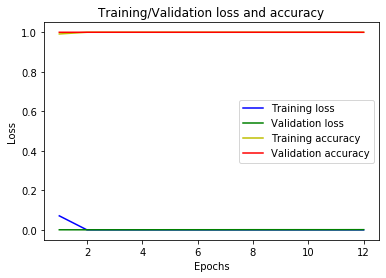

In [123]:
#3. 모델 구성하기
model = Sequential()
model.add(Dense(128, input_dim=X_resampled.shape[1], activation ='relu'))
model.add(Dense(64, activation ='relu'))
model.add(Dense(32, activation ='relu'))
model.add(Dense(16, activation ='relu'))
model.add(Dense(8, activation ='relu'))
model.add(Dense(1, activation ='sigmoid'))

#4. 모델 학습과정 설정하기
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['acc',f1_m,precision_m, recall_m])



#5. 모델 학습시키기
#5.1. Early Stopping
callbacks_list = [
    EarlyStopping(
    monitor='val_loss',
    patience=10,
    ),
     ModelCheckpoint(
     filepath='multi_model.h5',
     monitor='val_f1_m',
     save_best_only=True,
     )
]

hist = model.fit(X_resampled, y_resampled, epochs = 100,batch_size=1000,callbacks=callbacks_list,validation_data=(X_test, y_test))

#6. 모델 평가하기
scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

#epoch, loss, acc 그래프
loss = hist.history['loss']
val_loss = hist.history['val_loss']
acc = hist.history['acc']
val_acc = hist.history['val_acc']

epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')

plt.title('Training/Validation loss and accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [128]:
Y_predict = model.predict(X_test_tidf_vect)
test_data['smishing']=Y_predict
test_data.loc[test_data['smishing']>=0.5,'smishing']=1
test_data.loc[test_data['smishing']<0.5,'smishing']=0
test_data['smishing'].value_counts()

0.0    1534
1.0      92
Name: smishing, dtype: int64

test_data.to_csv("/content/drive/My Drive/Colab Notebooks/data/데이콘/os_수정방식_tfidf_keras.csv", mode='w')

LGBM보다는 Logitic회귀가 좀더 좋게 결과가 나오고 있음